In [13]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [14]:
font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          "roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

In [36]:
epl = Image.open(
    urlopen("https://raw.githubusercontent.com/baristaner/Football-Data/main/assets/superlig.png?token=GHSAT0AAAAAABYKZZ467SLTFVDUR6DVM45SY2IWFLQ")
)

season_dict = json.load(
    urlopen("https://raw.githubusercontent.com/baristaner/Football-Data/main/assets/superlig.json?token=GHSAT0AAAAAABYKZZ46PFQLYS25OE7IFVYYY2IWFGQ")
)



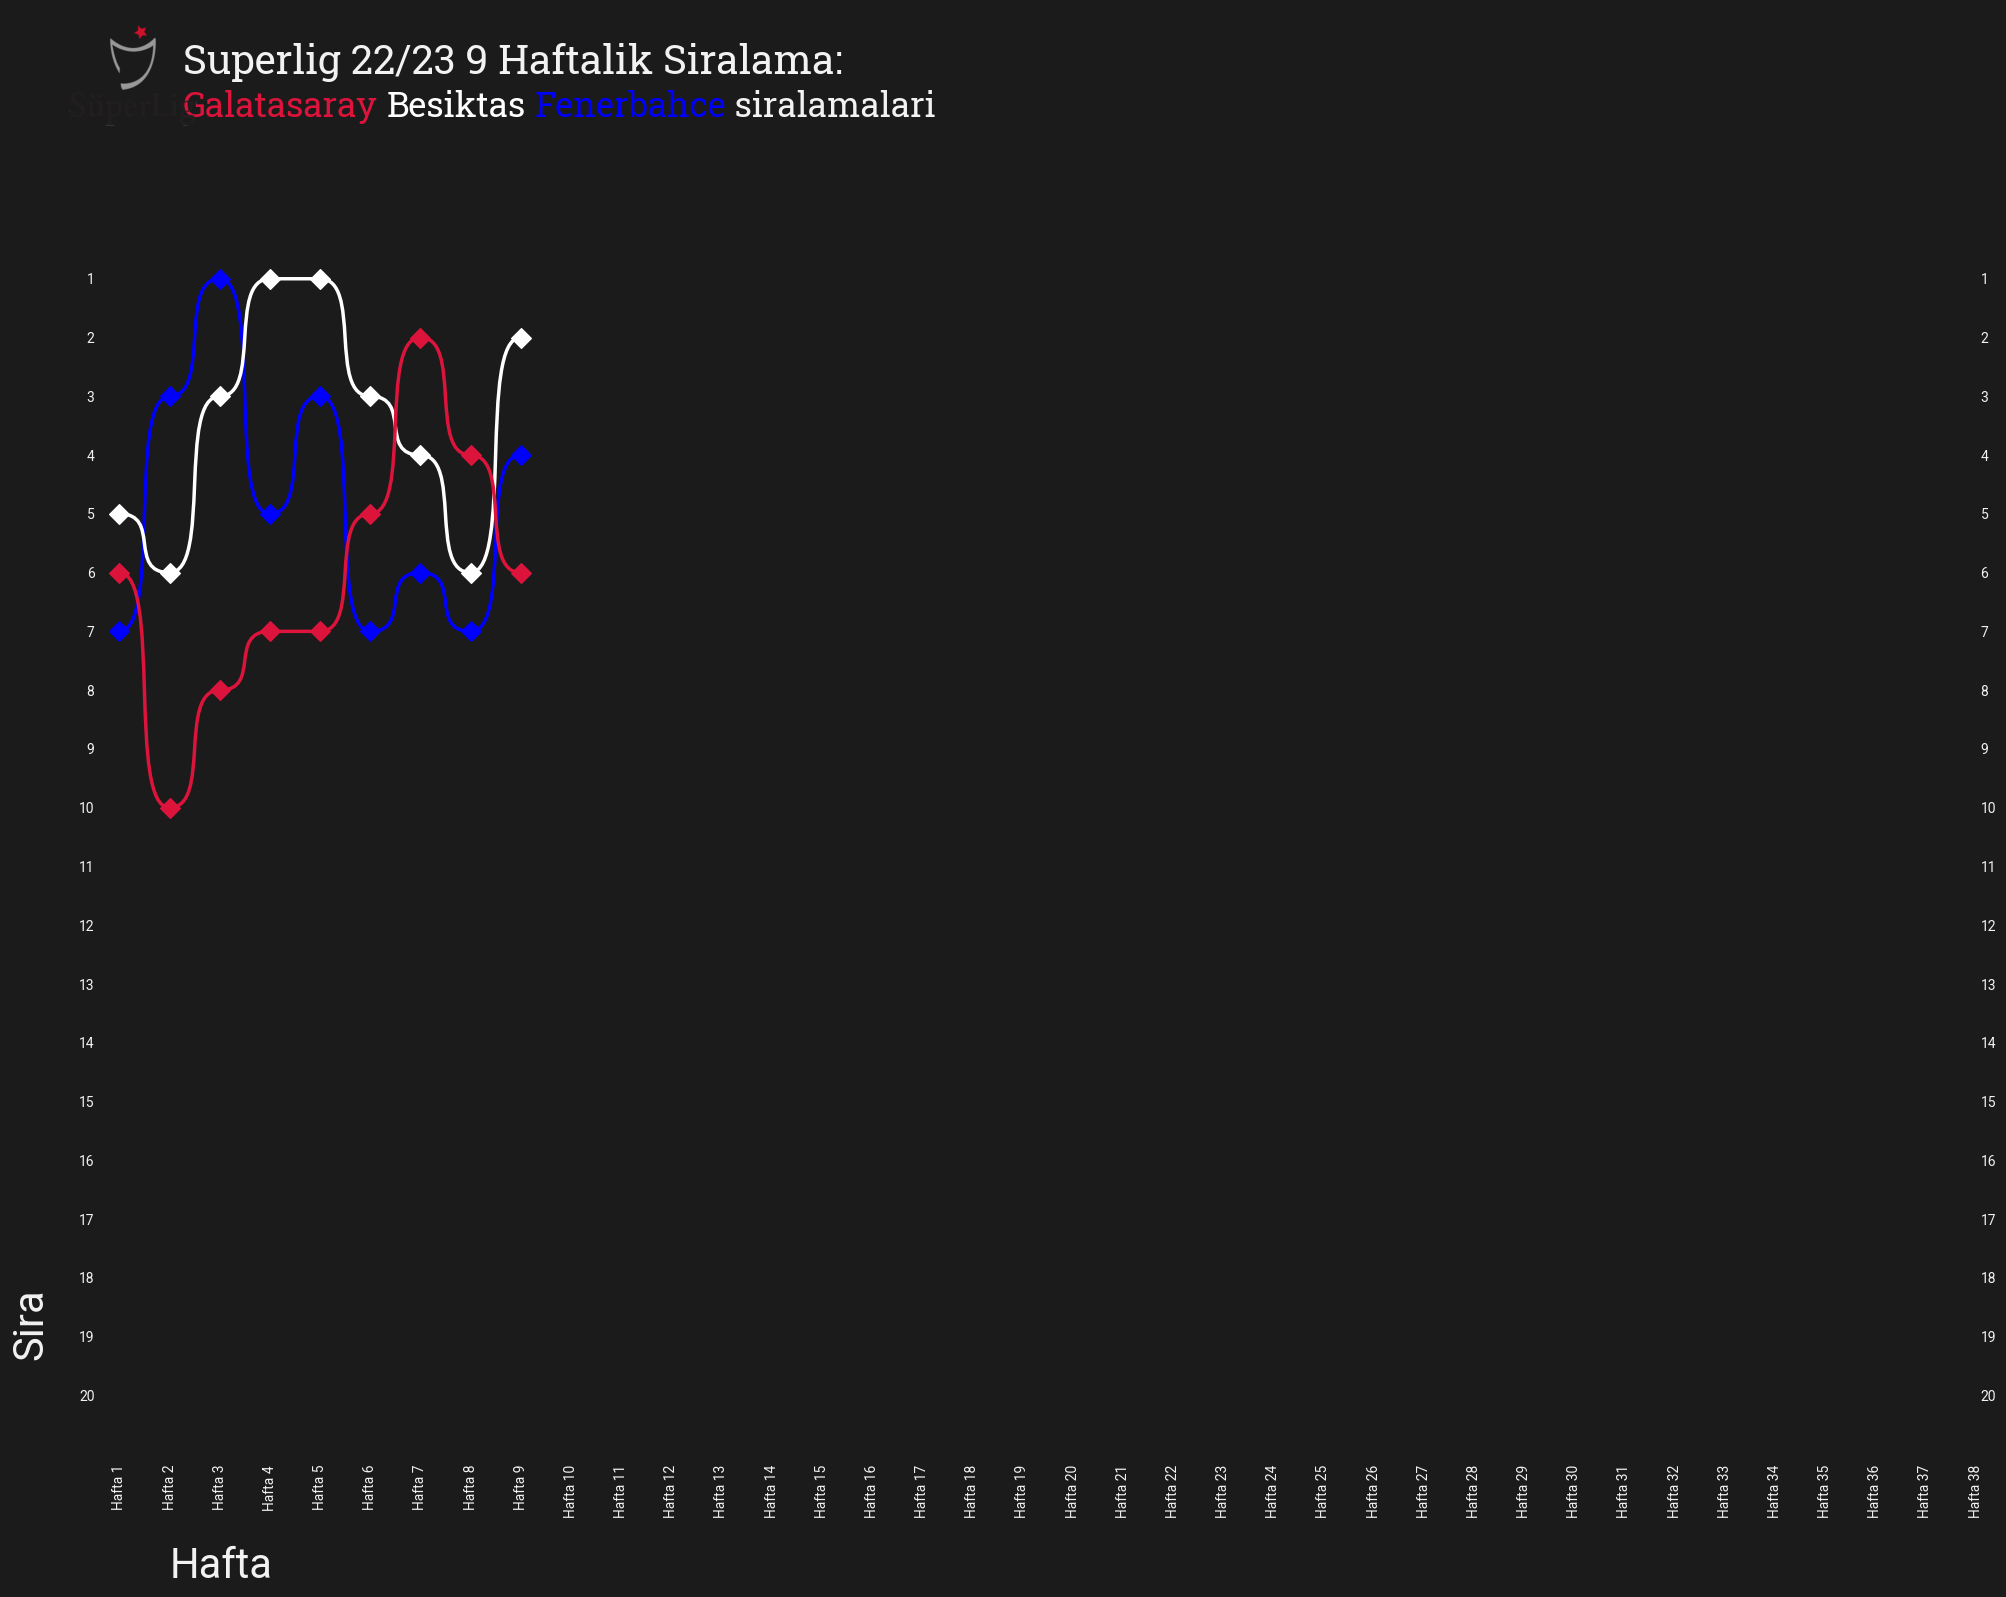

In [37]:

match_day = ["Hafta " + str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Galatasaray": "crimson",
    "Besiktas": "white",
    "Fenerbahce": "blue"
}

bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Hafta', y_label='Sira',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

TITLE = "Superlig 22/23 9 Haftalik Siralama:"
SUB_TITLE = "<Galatasaray> <Besiktas> <Fenerbahce> siralamalari"


fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)


fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'white'}, {"color": 'blue'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)


fig = add_image(
     epl,
     fig,  
     0.02, 0.9,  
     0.09, 0.09  
)


plt.tight_layout(pad=0.5)